In [74]:
import pandas as pd
import numpy as np
import sklearn as sns
import matplotlib.pyplot as plt

Vazifa
Quyidagi ma'lumotlar to'plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini taxmin qilishdir.

Tarkib
Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.

Ustunlar
Pregnancies: homilador bo'lish soni
Glucose: glyukozaga test natijasi
BloodPressure: diastolik qon bosimi (mm Hg)
SkinThickness: Triceps teri burmasining qalinligi (mm)
Insulin: 2 soatlik sarum insulini (mu U/ml)
BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)
DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
Age: Yosh (yil)
Outcome: Class (0 - diabet yo'q, 1 - diabet)

In [102]:
# git hub link
# url = 'https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv'
url = './data/diabetes.csv'
df = pd.read_csv(url)
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
688,1,140,74,26,180,24.1,0.828,23,0
491,2,89,90,30,0,33.5,0.292,42,0
399,3,193,70,31,0,34.9,0.241,25,1
420,1,119,88,41,170,45.3,0.507,26,0
434,1,90,68,8,0,24.5,1.138,36,0
263,3,142,80,15,0,32.4,0.200,63,0
412,1,143,84,23,310,42.4,1.076,22,0
379,0,93,100,39,72,43.4,1.021,35,0
376,0,98,82,15,84,25.2,0.299,22,0
447,0,95,80,45,92,36.5,0.330,26,0


In [84]:
X = df.drop(['Outcome', 'DiabetesPedigreeFunction'], axis=1).values
Y = df['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [85]:
# Dataning qancha qator va ustunlari borligini bilish uchun ishlatiladi
df.shape

(768, 9)

In [86]:
# Data ning har bir ushtunlari qanday malumot tur borligini korsatadi
df.dtypes 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [87]:
# nechta diyabet borligi va yoqligi haqida malumot ni ko`rsatadi`
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [88]:
# koreliyatsiyani tekshirishimiz munkun
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [89]:
# malum bir ustun boyicha koreliyatsiyani korishimiz munkun
df.corrwith(df['Pregnancies'].abs().sort_index(ascending=False))

Pregnancies                 1.000000
Glucose                     0.129459
BloodPressure               0.141282
SkinThickness              -0.081672
Insulin                    -0.073535
BMI                         0.017683
DiabetesPedigreeFunction   -0.033523
Age                         0.544341
Outcome                     0.221898
dtype: float64

In [90]:
# malumotlarni standartsizatsiya qilindi yani malum bir oraliqaqa tushirib olindi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [91]:
# datani train va test setlarga bolib olamiz
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

In [98]:
from  sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=19)

In [99]:
y_pridect = knn.predict(X_test)

In [100]:
# Modelni baholash
from sklearn.metrics import jaccard_score

jaccard_score(Y_test, y_pridect)

0.5555555555555556

In [95]:
# dataning eng yuqori natijaga erirish uchun k-ni topish
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=17),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [96]:
knn_gscv.best_params_

{'n_neighbors': 19}

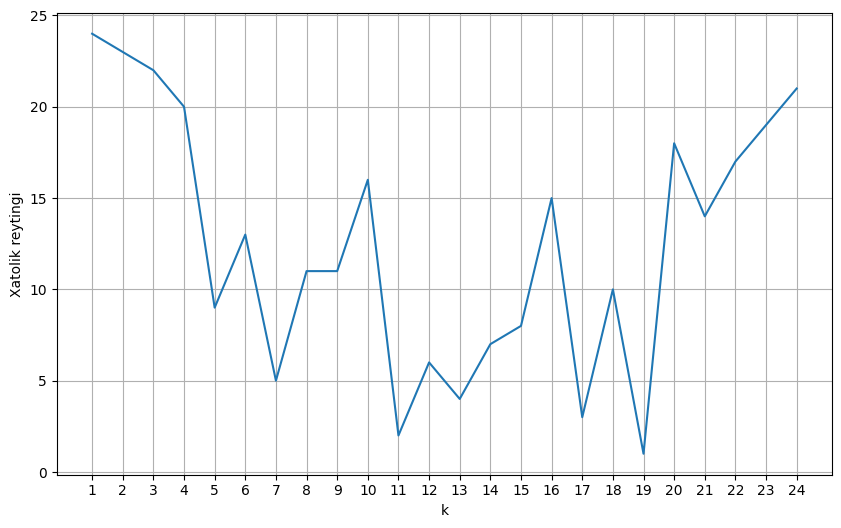

In [97]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()